# Working with Regression Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a continuous dependent variable is known as a **Regression Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Regression Tree model
+ How to visualize the structure of a Regression Tree
+ How to Prune a Regression Tree 

## 1. Collect the Data

In [1]:
import pandas as pd

income = pd.read_csv("income.csv")
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


## 2. Explore the Data

In [2]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [3]:
income.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

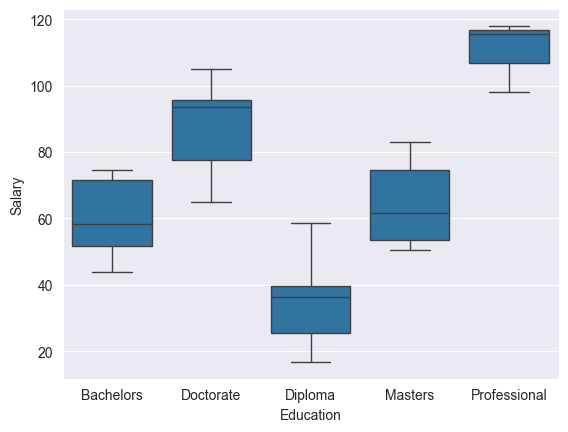

In [5]:
ax = sns.boxplot(data=income, x='Education', y='Salary')

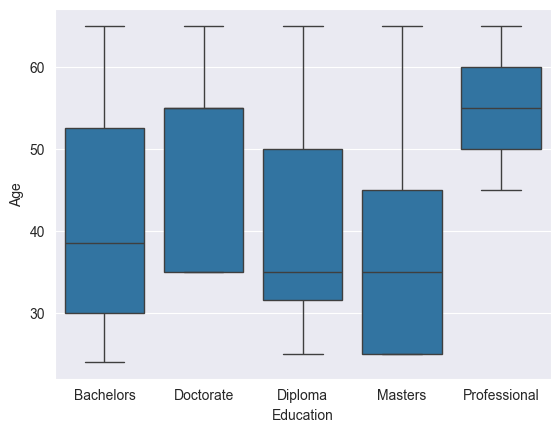

In [6]:
ax = sns.boxplot(data=income, x='Education', y='Age')

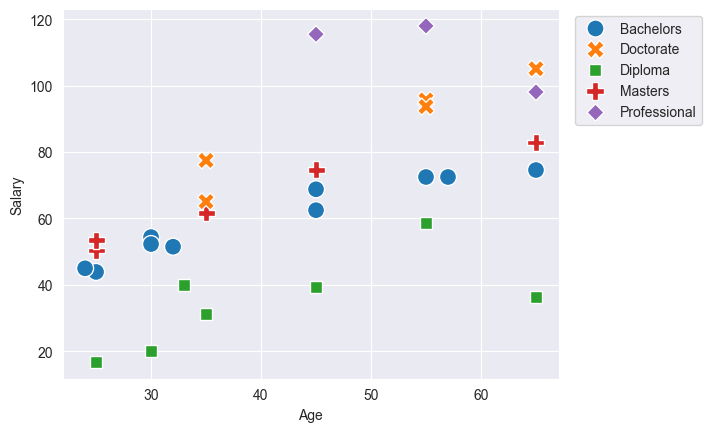

In [7]:
ax = sns.scatterplot(data=income,
                     x='Age',
                     y='Salary',
                     hue='Education',
                     style='Education',
                     s=150)
ax = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

## 3. Prepare the Data

Preparing data involves splitting data into training and test data sets

In [8]:
y = income['Salary']

In [9]:
X = income[['Age', 'Education']]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.6,
                                                    stratify=X['Education'],
                                                    random_state=1234)

In [11]:
X_train.shape, X_test.shape

((18, 2), (12, 2))

In [12]:
X_train.head()

,Age,Education
0,25,Bachelors
16,45,Masters
17,65,Masters
29,65,Professional
8,25,Diploma


Sci-Kit Learn package does not support non-numeric values like the Education column in our data. As a result we need to dummy code our 'Education' column as indicated below. 

In [13]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
0,25,True,False,False,False,False
16,45,False,False,False,True,False
17,65,False,False,False,True,False
29,65,False,False,False,False,True
8,25,False,True,False,False,False


In [14]:
X_test = pd.get_dummies(X_test)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
9,30,False,True,False,False,False
21,25,False,False,False,True,False
4,65,True,False,False,False,False
10,35,False,True,False,False,False
7,65,False,False,True,False,False


## 4. Train and Evaluate the Regression Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=1234)

In [16]:
model = regressor.fit(X_train, y_train)

In [17]:
model.score(X_test, y_test)

0.5853149222529794

In [18]:
y_test_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_test_pred)

np.float64(13.541666666666666)

## 5. Visualize the Regression Tree

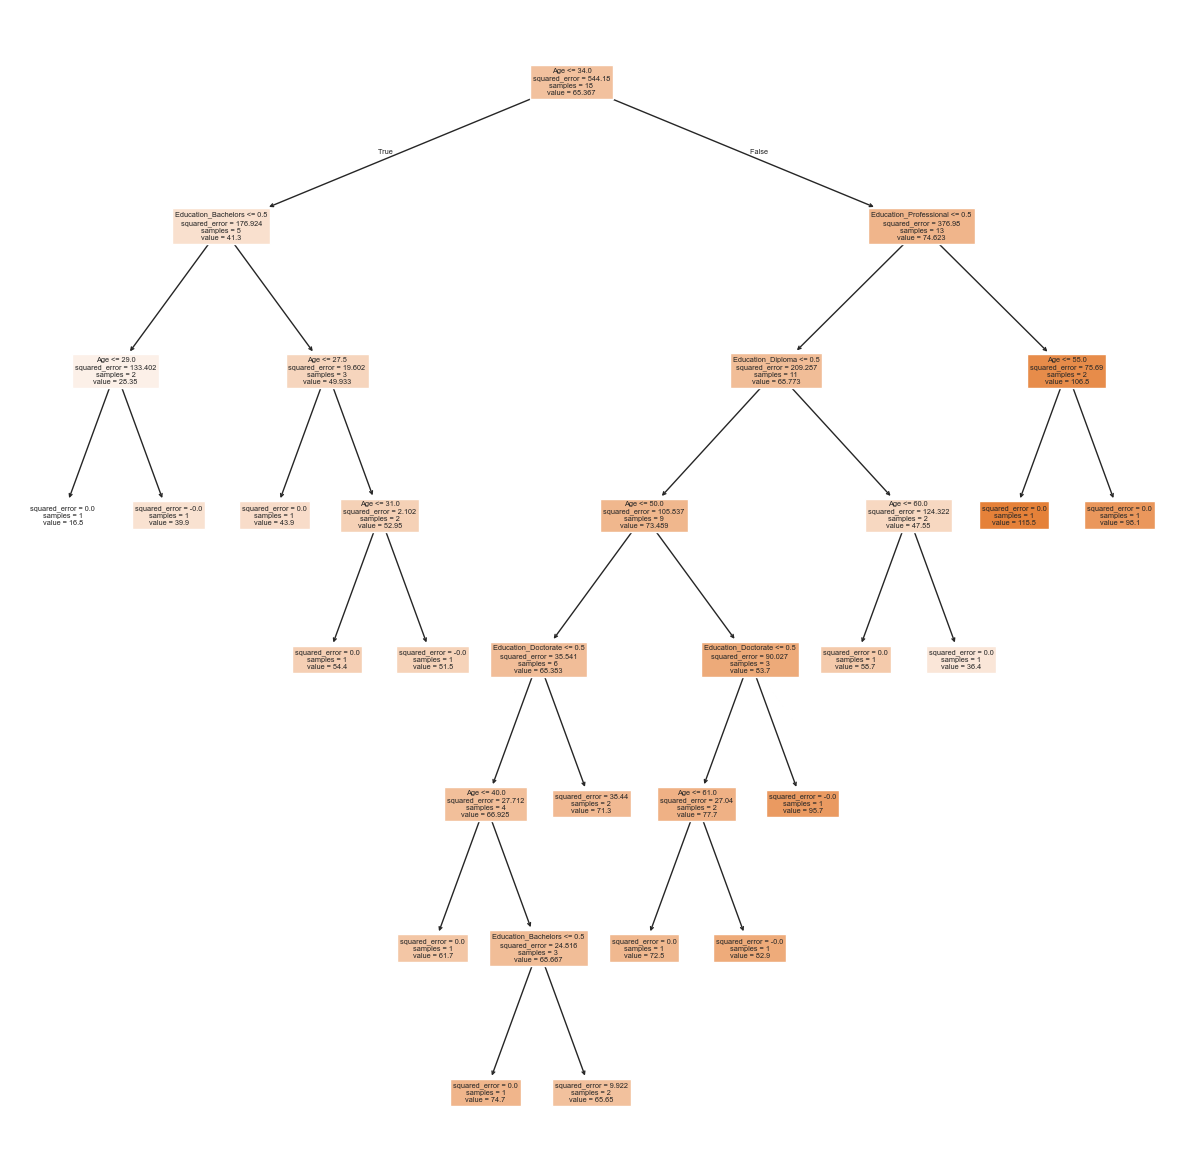

In [21]:
from sklearn import tree

plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names=list(X_train.columns), filled=True);

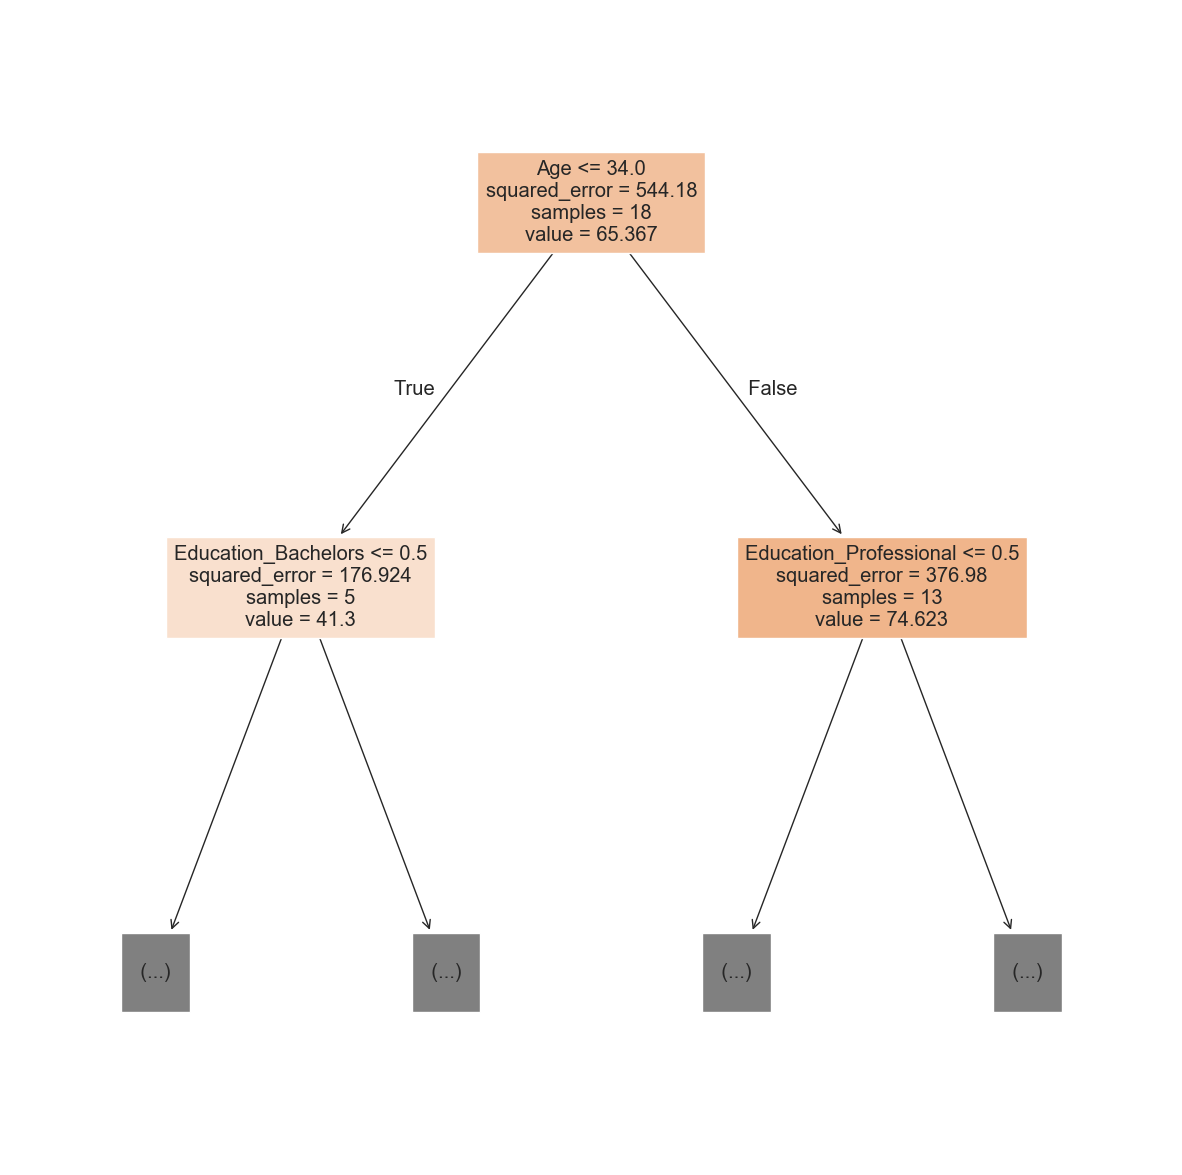

In [22]:
plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names=list(X_train.columns), filled=True, max_depth=1);

One of the benefits of decision tress is that they are pretty good at ranking the effectiveness of independent variables in predicting the values of the dependent variable. This is known as feature importance. We can get the feature importance of each independent variable as indicated below using `model.feature_importances_`. 

In [24]:
importance = model.feature_importances_
importance

array([0.54597998, 0.06326845, 0.11352129, 0.02490287, 0.        ,
       0.25232742])

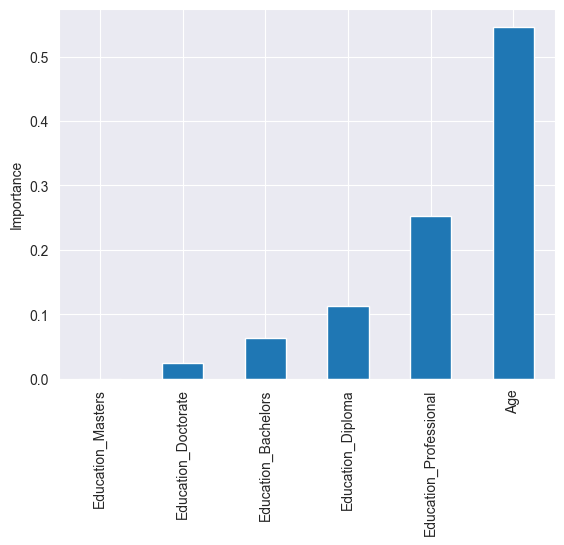

In [26]:
feature_importance = pd.Series(importance, index=X_train.columns)
feature_importance.sort_values().plot(kind='bar')
plt.ylabel('Importance');

## 6. Prune the Regression Tree

Once we have a regression tree built, now we need to check how to improve performance by pruning tree which helps to avoid tress that overfit the training data. 

In [27]:
model.score(X_train, y_train)

0.9901253057607573

In [28]:
model.score(X_test, y_test)

0.5853149222529794

There are 2 methods to prune a tree. Pre-Pruning and Post-Pruning. Here we are going to use Cost Complexity Pruning method. Primary objective of Cost Complexity Pruning is to find the right parameter known as Alpha. The right alpha is the one that performs the best with the test data. 

Let's get the list of effective alphas for the training data.

In [32]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # List of effective alphas. The larger the value of alpha, the smaller the tree will be. 
list(ccp_alphas)

[np.float64(0.0),
 np.float64(0.23361111111110705),
 np.float64(2.1578395061724223),
 np.float64(3.004444444444693),
 np.float64(3.0334259259259144),
 np.float64(8.409999999999753),
 np.float64(12.000000000000506),
 np.float64(13.813611111110644),
 np.float64(14.822500000000016),
 np.float64(26.06669753086468),
 np.float64(31.05601851851865),
 np.float64(61.1659960718292),
 np.float64(135.95562548562512),
 np.float64(222.77094017094078)]

We remove the maximum effective alpha because it is the trivial tree with just one node.

In [33]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas)

[np.float64(0.0),
 np.float64(0.23361111111110705),
 np.float64(2.1578395061724223),
 np.float64(3.004444444444693),
 np.float64(3.0334259259259144),
 np.float64(8.409999999999753),
 np.float64(12.000000000000506),
 np.float64(13.813611111110644),
 np.float64(14.822500000000016),
 np.float64(26.06669753086468),
 np.float64(31.05601851851865),
 np.float64(61.1659960718292),
 np.float64(135.95562548562512)]

Next, we train several trees using the different values for alpha.

In [34]:
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    regressor_ = DecisionTreeRegressor(random_state=1234, ccp_alpha=alpha)
    model_ = regressor_.fit(X_train, y_train)
    train_scores.append(model_.score(X_train, y_train))
    test_scores.append(model_.score(X_test, y_test))

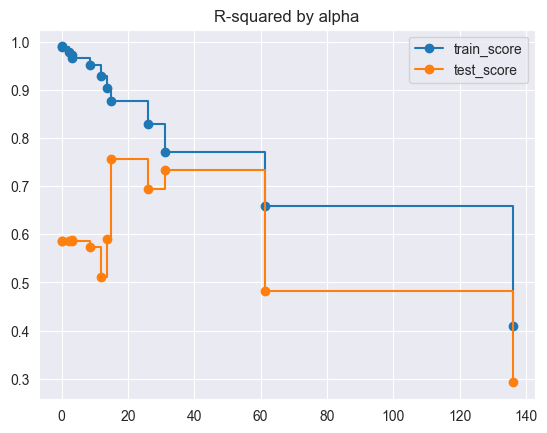

In [35]:
plt.plot(ccp_alphas,
         train_scores,
         marker="o",
         label='train_score',
         drawstyle="steps-post")
plt.plot(ccp_alphas,
         test_scores,
         marker="o",
         label='test_score',
         drawstyle="steps-post")
plt.legend()
plt.title('R-squared by alpha');

In [36]:
test_scores

[0.5853149222529794,
 0.5857107382012932,
 0.5857107382012932,
 0.5889110156116097,
 0.5861012049128272,
 0.5742699063850475,
 0.5110187660049715,
 0.5901546580161237,
 0.7572572323335666,
 0.6933555316243081,
 0.7328980549684876,
 0.4823659659054369,
 0.2920328593359385]

In [37]:
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

np.float64(14.822500000000016)

In [38]:
regressor_ = DecisionTreeRegressor(random_state=1234, ccp_alpha=best_alpha)
model_ = regressor_.fit(X_train, y_train)

In [39]:
model_.score(X_train, y_train)

0.8765762758237674

In [40]:
model_.score(X_test, y_test)

0.7572572323335666

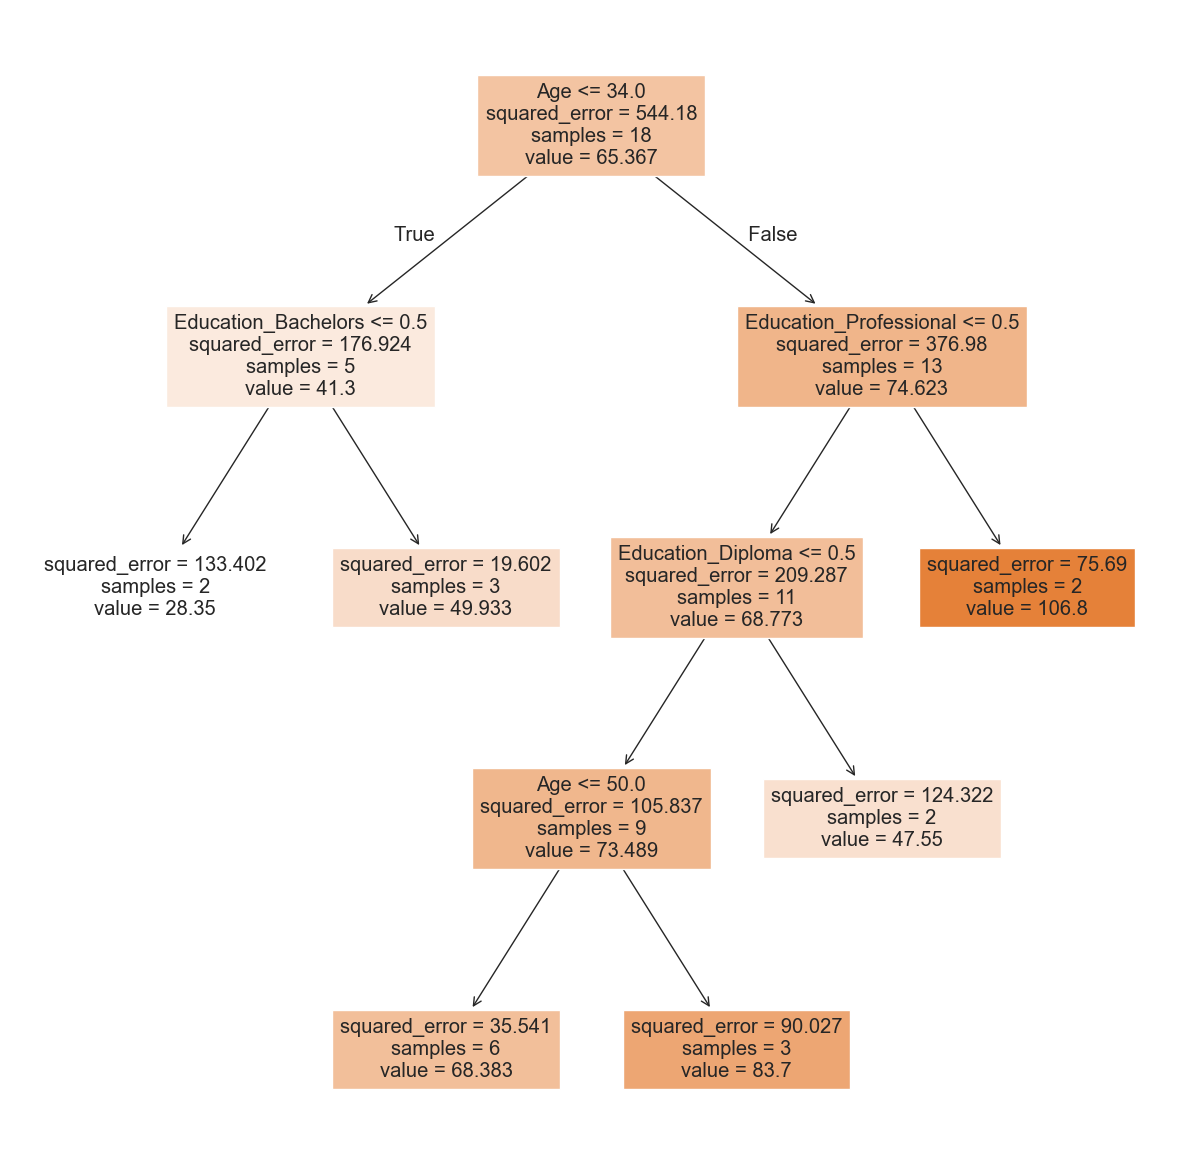

In [41]:
plt.figure(figsize=(15, 15))
tree.plot_tree(model_,
               feature_names=list(X_train.columns),
               filled=True);